# RLCS 2021-22 Dataset Demo: Player profile explain with score.

Ok, so I do not really know what to put in this notebook to show what is possible with the data available [here](https://www.kaggle.com/dylanmonfret/rlcs-202122), because we could basically do any kind of data analysis or machine learning process compatible with tabular data. For example, we could remake some ballchasing.com data visualization elements, show head-to-head results between teams or players through the whole season, or build predictive models based on what we have in our hands (I am currently working on this).

The first two options could be interesting to train our self with data manipulation and the last one might be quite long and need some reflexion to establish the right methodology.

So, let's try something easier but still interesting to analyse: "players type".

We are not going to explain entirely what Rocket League is again, since it was already done [here](https://www.kaggle.com/dylanmonfret/rlcs-202122). But let's just make a quick reminder: two teams of 3 players face each others in a 5 minutes (+ overtime in case of tie after 5 minutes) game and the team who scored the most goals wins the game.

This is basically football with car (and not "soccer", and EU > NA, always), meaning goals, assists and saves are counted like we use to do with actual football games. In this way, we can define simple types of player by the field their performing the most:

* __Scorer / Striker__: a player contributing to the team by scoring.
* __Passer / Support__: a player contributing to the team by doing assits.
* __Keeper / Defender__: a player contributing to the team by saving goals.

Let's now try to illustrate this with `by_players.csv`, `by_teams.csv`, `general.csv` files.

## Librairies imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

C:\Users\bench\anaconda3\envs\p38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bench\anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\bench\anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


## Dataframe imports

In [5]:
folder = "data/rlcs-202122/"
main = pd.read_csv(folder + 'main.csv', low_memory=False, encoding='utf8')
teams = pd.read_csv(folder + 'games_by_teams.csv', low_memory=False, encoding='utf8')
players = pd.read_csv(folder + 'games_by_players.csv', low_memory=False, encoding='utf8')

In [3]:
players

game_id   color                   team_id  \
0      616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
1      616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
2      616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
3      616004f3143c37878b238690  orange  614c8930f8090ec745286474   
4      616004f3143c37878b238690  orange  614c8930f8090ec745286474   
...                         ...     ...                       ...   
73105  6240efb6da9d7ca1c7bab3e2    blue  6020bc70f1e4807cc70023a5   
73106  6240efb6da9d7ca1c7bab3e2    blue  6020bc70f1e4807cc70023a5   
73107  6240efb6da9d7ca1c7bab3e2  orange  6020c2b7f1e4807cc702ac15   
73108  6240efb6da9d7ca1c7bab3e2  orange  6020c2b7f1e4807cc702ac15   
73109  6240efb6da9d7ca1c7bab3e2  orange  6020c2b7f1e4807cc702ac15   

         team_region                 player_id player_tag  core_shots  \
0            Oceania  5f3d8fdd95f40596eae2412e     Amphis           4   
1            Oceania  5f3d8fdd95f40596eae23e01     Torsos           5   
2            Oceania  5f3d8fdd95f40596eae23e53    Express           4   
3            Oceania  604e562901d675f81a96b270    mel kin           2   
4            Oceania  5f7ca648ea8a0f0714fb9a20      Laxin           1   
...              ...                       ...        ...         ...   
73105  North America  5f3d8fdd95f40596eae23d8f     JKnaps           2   
73106  North America  5f3d8fdd95f40596eae23dba    Chicago           2   
73107         Europe  5faeab91e9ce4ed313ea9570     Vatira           2   
73108         Europe  5f3d8fdd95f40596eae23f9e      rise.           2   
73109         Europe  5f3d8fdd95f40596eae24232       Joyo           4   

       core_goals  core_saves  core_assists  ...  car_id  car_name  \
0               1           1             0  ...  4284.0    Fennec   
1               0           2             1  ...   403.0   Dominus   
2               1           0             0  ...  4284.0    Fennec   
3               0           6             0  ...   403.0   Dominus   
4               0           3             0  ...    23.0    Octane   
...           ...         ...           ...  ...     ...       ...   
73105           1           2             1  ...  4284.0    Fennec   
73106           0           1             1  ...    23.0    Octane   
73107           0           3             0  ...  4284.0    Fennec   
73108           1           0             0  ...    23.0    Octane   
73109           0           0             1  ...    23.0    Octane   

       steering_sensitivity  camera_fov  camera_height  camera_pitch  \
0                      3.05       110.0          100.0          -3.0   
1                      1.00       110.0          100.0          -2.0   
2                      1.30       110.0          100.0          -3.0   
3                      1.51       110.0           90.0          -4.0   
4                      1.75       110.0           90.0          -5.0   
...                     ...         ...            ...           ...   
73105                  2.00       108.0          100.0          -4.0   
73106                  3.50       110.0          100.0          -3.0   
73107                  2.01       110.0           90.0          -5.0   
73108                  1.30       110.0           90.0          -5.0   
73109                  2.00       110.0          100.0          -4.0   

       camera_distance  camera_stiffness  camera_swivel_speed  \
0                260.0              0.40                  2.4   
1                250.0              0.55                 10.0   
2                260.0              0.50                  2.5   
3                280.0              0.30                  6.0   
4                270.0              0.25                 10.0   
...                ...               ...                  ...   
73105            270.0              0.40                  2.7   
73106            270.0              0.40                 10.0   
73107            260.0     

In [4]:
teams

game_id   color                   team_id  \
0      616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
1      616004f3143c37878b238690  orange  614c8930f8090ec745286474   
2      616004f7143c37878b238697    blue  6020bc8ef1e4807cc700391a   
3      616004f7143c37878b238697  orange  614c8930f8090ec745286474   
4      616004fc143c37878b23869e    blue  6020bc8ef1e4807cc700391a   
...                         ...     ...                       ...   
24365  6240e99bc437fde7e02d2ce1  orange  6020c2b7f1e4807cc702ac15   
24366  6240eb5fc437fde7e02d2ce8    blue  6020bc70f1e4807cc70023a5   
24367  6240eb5fc437fde7e02d2ce8  orange  6020c2b7f1e4807cc702ac15   
24368  6240efb6da9d7ca1c7bab3e2    blue  6020bc70f1e4807cc70023a5   
24369  6240efb6da9d7ca1c7bab3e2  orange  6020c2b7f1e4807cc702ac15   

                                             team_slug           team_name  \
0      https://octane.gg/teams/391a-ground-zero-gaming  GROUND ZERO GAMING   
1           https://octane.gg/teams/6474-ranga-roundup       RANGA ROUNDUP   
2      https://octane.gg/teams/391a-ground-zero-gaming  GROUND ZERO GAMING   
3           https://octane.gg/teams/6474-ranga-roundup       RANGA ROUNDUP   
4      https://octane.gg/teams/391a-ground-zero-gaming  GROUND ZERO GAMING   
...                                                ...                 ...   
24365          https://octane.gg/teams/ac15-team-queso          TEAM QUESO   
24366          https://octane.gg/teams/23a5-g2-esports          G2 ESPORTS   
24367          https://octane.gg/teams/ac15-team-queso          TEAM QUESO   
24368          https://octane.gg/teams/23a5-g2-esports          G2 ESPORTS   
24369          https://octane.gg/teams/ac15-team-queso          TEAM QUESO   

         team_region  ball_possession_time  ball_time_in_side  core_shots  \
0            Oceania                136.54             170.84          13   
1            Oceania                153.60             148.51           4   
2            Oceania                155.79             145.60          10   
3            Oceania                126.81             185.78           6   
4            Oceania                165.76             136.11          11   
...              ...                   ...                ...         ...   
24365         Europe                155.70             114.45          12   
24366  North America                146.99             174.27           4   
24367         Europe                157.21             148.23           9   
24368  North America                158.89             148.21           8   
24369         Europe                127.37             180.53           8   

       core_goals  ...  positioning_time_defensive_third  \
0               2  ...                            513.73   
1               1  ...                            457.04   
2               4  ...                            507.95   
3               2  ...                            561.51   
4               3  ...                            476.66   
...           ...  ...                               ...   
24365           1  ...                            365.61   
24366           2  ...                            468.81   
24367           1  ...                            450.88   
24368           4  ...                            523.02   
24369           1  ...                            511.28   

       positioning_time_neutral_third  positioning_time_offensive_third  \
0                              291.06                            189.48   
1                              329.25                            214.03   
2                              308.51                            264.92   
3                              360.96                            147.48   
4                              373.66                            279.05   
...                               ...                               ...   
24365                          323.32                            233.61   
24366       

In [5]:
main

event_id       event event_split event_region  \
0      614b7046f8090ec74528642d  Regional 1        Fall      Oceania   
1      614b7046f8090ec74528642d  Regional 1        Fall      Oceania   
2      614b7046f8090ec74528642d  Regional 1        Fall      Oceania   
3      614b7046f8090ec74528642d  Regional 1        Fall      Oceania   
4      614b7046f8090ec74528642d  Regional 1        Fall      Oceania   
...                         ...         ...         ...          ...   
12844  614b6649f8090ec745286427       Major      Winter        World   
12845  614b6649f8090ec745286427       Major      Winter        World   
12846  614b6649f8090ec745286427       Major      Winter        World   
12847  614b6649f8090ec745286427       Major      Winter        World   
12848  614b6649f8090ec745286427       Major      Winter        World   

                                              event_slug  \
0      https://octane.gg/events/642d-rlcs-2021-22-fal...   
1      https://octane.gg/events/642d-rlcs-2021-22-fal...   
2      https://octane.gg/events/642d-rlcs-2021-22-fal...   
3      https://octane.gg/events/642d-rlcs-2021-22-fal...   
4      https://octane.gg/events/642d-rlcs-2021-22-fal...   
...                                                  ...   
12844  https://octane.gg/events/6427-rlcs-2021-22-win...   
12845  https://octane.gg/events/6427-rlcs-2021-22-win...   
12846  https://octane.gg/events/6427-rlcs-2021-22-win...   
12847  https://octane.gg/events/6427-rlcs-2021-22-win...   
12848  https://octane.gg/events/6427-rlcs-2021-22-win...   

                event_start_date             event_end_date event_tier  \
0      2021-10-07 23:00:00+00:00  2021-10-17 22:30:00+00:00          A   
1      2021-10-07 23:00:00+00:00  2021-10-17 22:30:00+00:00          A   
2      2021-10-07 23:00:00+00:00  2021-10-17 22:30:00+00:00          A   
3      2021-10-07 23:00:00+00:00  2021-10-17 22:30:00+00:00          A   
4      2021-10-07 23:00:00+00:00  2021-10-17 22:30:00+00:00          A   
...                          ...                        ...        ...   
12844  2022-03-23 00:00:00+00:00  2022-03-27 22:30:00+00:00          S   
12845  2022-03-23 00:00:00+00:00  2022-03-27 22:30:00+00:00          S   
12846  2022-03-23 00:00:00+00:00  2022-03-27 22:30:00+00:00          S   
12847  2022-03-23 00:00:00+00:00  2022-03-27 22:30:00+00:00          S   
12848  2022-03-23 00:00:00+00:00  2022-03-27 22:30:00+00:00          S   

                  event_phase  prize_money  ...  reverse_sweep_attempt  \
0      Invitational Qualifier      30000.0  ...                  False   
1      Invitational Qualifier      30000.0  ...                  False   
2      Invitational Qualifier      30000.0  ...                  False   
3      Invitational Qualifier      30000.0  ...                  False   
4      Invitational Qualifier      30000.0  ...                  False   
...                       ...          ...  ...                    ...   
12844              Main Event     300000.0  ...                  False   
12845              Main Event     300000.0  ...                  False   
12846              Main Event     300000.0  ...                  False   
12847              Main Event     300000.0  ...                  False   
12848              Main Event     300000.0  ...                  False   

      reverse_sweep                   game_id game_number  \
0             False  616004f3143c37878b238690         1.0   
1             False  616004f7143c37878b238697         2.0   
2             False  616004fc143c37878b23869e         3.0   
3             False  61614e40f8090ec74528706b         1.0   
4             False  61614e45143c37878b2387b8         2.0   
...             ...                       ...         ...   
12844         False  6240e603da9d7ca1c7bab3cd         2.0   
12845         False  6240e7c0da9d7ca1c7bab3d4         3.0   
12846         False  6240e99bc437fde7e02d2ce1         4.0   
12847         False  6240eb5fc437fde7e02d2ce8    

## Preparations

We actually do not need all the features from each dataframe for what is following, so we will keep what (I believe) is usefull or interesting to have to define players profiles (Stikers, Passers and Goalkeepers).

In [6]:
main = main.loc[:, ['game_id', 'match_date']]
main

game_id                 match_date
0      616004f3143c37878b238690  2021-10-08 06:00:00+00:00
1      616004f7143c37878b238697  2021-10-08 06:00:00+00:00
2      616004fc143c37878b23869e  2021-10-08 06:00:00+00:00
3      61614e40f8090ec74528706b  2021-10-08 06:00:00+00:00
4      61614e45143c37878b2387b8  2021-10-08 06:00:00+00:00
...                         ...                        ...
12844  6240e603da9d7ca1c7bab3cd  2022-03-27 22:00:00+00:00
12845  6240e7c0da9d7ca1c7bab3d4  2022-03-27 22:00:00+00:00
12846  6240e99bc437fde7e02d2ce1  2022-03-27 22:00:00+00:00
12847  6240eb5fc437fde7e02d2ce8  2022-03-27 22:00:00+00:00
12848  6240efb6da9d7ca1c7bab3e2  2022-03-27 22:00:00+00:00

[12849 rows x 2 columns]

In [7]:
players = players.loc[:, ['game_id', 'team_id', 'team_region', 'player_id', 'player_tag', 'core_goals', 'core_assists', 'core_saves', 'advanced_rating']]
players

game_id                   team_id    team_region  \
0      616004f3143c37878b238690  6020bc8ef1e4807cc700391a        Oceania   
1      616004f3143c37878b238690  6020bc8ef1e4807cc700391a        Oceania   
2      616004f3143c37878b238690  6020bc8ef1e4807cc700391a        Oceania   
3      616004f3143c37878b238690  614c8930f8090ec745286474        Oceania   
4      616004f3143c37878b238690  614c8930f8090ec745286474        Oceania   
...                         ...                       ...            ...   
73105  6240efb6da9d7ca1c7bab3e2  6020bc70f1e4807cc70023a5  North America   
73106  6240efb6da9d7ca1c7bab3e2  6020bc70f1e4807cc70023a5  North America   
73107  6240efb6da9d7ca1c7bab3e2  6020c2b7f1e4807cc702ac15         Europe   
73108  6240efb6da9d7ca1c7bab3e2  6020c2b7f1e4807cc702ac15         Europe   
73109  6240efb6da9d7ca1c7bab3e2  6020c2b7f1e4807cc702ac15         Europe   

                      player_id player_tag  core_goals  core_assists  \
0      5f3d8fdd95f40596eae2412e     Amphis           1             0   
1      5f3d8fdd95f40596eae23e01     Torsos           0             1   
2      5f3d8fdd95f40596eae23e53    Express           1             0   
3      604e562901d675f81a96b270    mel kin           0             0   
4      5f7ca648ea8a0f0714fb9a20      Laxin           0             0   
...                         ...        ...         ...           ...   
73105  5f3d8fdd95f40596eae23d8f     JKnaps           1             1   
73106  5f3d8fdd95f40596eae23dba    Chicago           0             1   
73107  5faeab91e9ce4ed313ea9570     Vatira           0             0   
73108  5f3d8fdd95f40596eae23f9e      rise.           1             0   
73109  5f3d8fdd95f40596eae24232       Joyo           0             1   

       core_saves  advanced_rating  
0               1         0.916465  
1               2         0.966440  
2               0         0.781224  
3               6         0.824301  
4               3         0.457923  
...           ...              ...  
73105           2         1.329439  
73106           1         0.614849  
73107           3         0.512827  
73108           0         0.948364  
73109           0         0.799566  

[73110 rows x 9 columns]

In [6]:
# teams = teams.loc[:, ['game_id','team_id', 'team_name', 'team_region']]
teams.columns

Index(['game_id', 'color', 'team_id', 'team_slug', 'team_name', 'team_region',
       'ball_possession_time', 'ball_time_in_side', 'core_shots', 'core_goals',
       'core_saves', 'core_assists', 'core_score', 'core_shooting_percentage',
       'boost_bpm', 'boost_bcpm', 'boost_avg_amount', 'boost_amount_collected',
       'boost_amount_stolen', 'boost_amount_collected_big',
       'boost_amount_stolen_big', 'boost_amount_collected_small',
       'boost_amount_stolen_small', 'boost_count_collected_big',
       'boost_count_stolen_big', 'boost_count_collected_small',
       'boost_count_stolen_small', 'boost_amount_overfill',
       'boost_amount_overfill_stolen', 'boost_amount_used_while_supersonic',
       'boost_time_zero_boost', 'boost_time_full_boost',
       'boost_time_boost_0_25', 'boost_time_boost_25_50',
       'boost_time_boost_50_75', 'boost_time_boost_75_100',
       'movement_total_distance', 'movement_time_supersonic_speed',
       'movement_time_boost_speed', 'movement_t

In [9]:
data = main.merge(players).merge(teams)
data = data.reindex(columns=['game_id', 'match_date', 'team_id', 'team_name', 'team_region', 'player_id', 'player_tag', 'core_goals', 'core_assists', 'core_saves',
                             'advanced_rating'])

data.drop('game_id', axis=1, inplace=True)
data.rename(columns={'match_date': 'date', 'core_goals': 'goals', 'core_assists': 'assists', 'core_saves': 'saves', 'advanced_rating': 'rating'}, inplace=True)

data

date                   team_id  \
0      2021-10-08 06:00:00+00:00  6020bc8ef1e4807cc700391a   
1      2021-10-08 06:00:00+00:00  6020bc8ef1e4807cc700391a   
2      2021-10-08 06:00:00+00:00  6020bc8ef1e4807cc700391a   
3      2021-10-08 06:00:00+00:00  614c8930f8090ec745286474   
4      2021-10-08 06:00:00+00:00  614c8930f8090ec745286474   
...                          ...                       ...   
73105  2022-03-27 22:00:00+00:00  6020bc70f1e4807cc70023a5   
73106  2022-03-27 22:00:00+00:00  6020bc70f1e4807cc70023a5   
73107  2022-03-27 22:00:00+00:00  6020c2b7f1e4807cc702ac15   
73108  2022-03-27 22:00:00+00:00  6020c2b7f1e4807cc702ac15   
73109  2022-03-27 22:00:00+00:00  6020c2b7f1e4807cc702ac15   

                team_name    team_region                 player_id player_tag  \
0      GROUND ZERO GAMING        Oceania  5f3d8fdd95f40596eae2412e     Amphis   
1      GROUND ZERO GAMING        Oceania  5f3d8fdd95f40596eae23e01     Torsos   
2      GROUND ZERO GAMING        Oceania  5f3d8fdd95f40596eae23e53    Express   
3           RANGA ROUNDUP        Oceania  604e562901d675f81a96b270    mel kin   
4           RANGA ROUNDUP        Oceania  5f7ca648ea8a0f0714fb9a20      Laxin   
...                   ...            ...                       ...        ...   
73105          G2 ESPORTS  North America  5f3d8fdd95f40596eae23d8f     JKnaps   
73106          G2 ESPORTS  North America  5f3d8fdd95f40596eae23dba    Chicago   
73107          TEAM QUESO         Europe  5faeab91e9ce4ed313ea9570     Vatira   
73108          TEAM QUESO         Europe  5f3d8fdd95f40596eae23f9e      rise.   
73109          TEAM QUESO         Europe  5f3d8fdd95f40596eae24232       Joyo   

       goals  assists  saves    rating  
0          1        0      1  0.916465  
1          0        1      2  0.966440  
2          1        0      0  0.781224  
3          0        0      6  0.824301  
4          0        0      3  0.457923  
...      ...      ...    ...       ...  
73105      1        1      2  1.329439  
73106      0        1      1  0.614849  
73107      0        0      3  0.512827  
73108      1        0      0  0.948364  
73109      0        1      0  0.799566  

[73110 rows x 10 columns]

## Filtering & Averaging variables

### Filtering outlier

Since we are going to average variables over the whole dataset to then plot them, it would be interesting to get rid of the few "outliers" present in the data. We are talking here about players with extreme values due to a number of games played lower than normal. So let's count game played by players during the season.



In [10]:
counting = data[['player_id', 'rating']] \
            .groupby('player_id', as_index=False) \
            .count() \
            .rename(columns={'rating': 'count'}) \
            .sort_values('count', ascending=False)

Then let's keep players with a minimum of 9 games played since the beginning of RLCS. Now, you may ask "why 9 games especially" ? Well, because at the moment (with the Fall split finished and the ongoing Winter Split), 9 is the minimal number of game a starter player can make during Main Event (going 0-3 Bo5 in Swiss Stage during Fall or going 0-3 Bo5 in Group Stage during Winter and getting swept at each series). This will get rid of substitute / stand-in players with not enough games to be relevant for further analysis.

In [11]:
counting = counting[counting['count'] >= 9].reset_index(drop=True)
counting

player_id  count
0    5f3d8fdd95f40596eae24232    294
1    5faeab91e9ce4ed313ea9570    294
2    5f3d8fdd95f40596eae23f9e    294
3    5f3d8fdd95f40596eae23d6f    275
4    5f3d8fdd95f40596eae23dcf    275
..                        ...    ...
881  60bbd0576dcdb413cff64a0c      9
882  618960d2143c37878b23d00d      9
883  621ca5eac437fde7e02d0fd5      9
884  61f91694da9d7ca1c7ba759a      9
885  621ca5eac437fde7e02d0fd6      9

[886 rows x 2 columns]

In [12]:
validate = set(counting.player_id.tolist())  # Creating a set to aply isin() function after.

In [13]:
player_tag_db = data.loc[:, ['date', 'team_id', 'team_region', 'team_name', 'player_id', 'player_tag']] \
    .sort_values('date', ascending=False) \
    .drop('date', axis=1) \
    .drop_duplicates(subset=['player_id']) \
    .sort_values('player_tag', key= lambda x: x.str.lower()) \
    .reset_index(drop=True)

player_tag_db

team_id                 team_region  \
0     6020bd97f1e4807cc700dbe0               North America   
1     620a45d7c437fde7e02cff21          Asia-Pacific South   
2     61845f24f8090ec74528af10          Sub-Saharan Africa   
3     6020c3eef1e4807cc7033147               North America   
4     61d169b7c437fde7e02cb5b6  Middle East & North Africa   
...                        ...                         ...   
1048  61ed271eda9d7ca1c7ba5b29  Middle East & North Africa   
1049  6020bd98f1e4807cc700dc34               North America   
1050  61d80a3dc437fde7e02cb5b7                     Oceania   
1051  61ee75a7da9d7ca1c7ba5d9a          Asia-Pacific South   
1052  61800d02f8090ec74528a5a1          Sub-Saharan Africa   

               team_name                 player_id  player_tag  
0                EUNITED  5f3d8fdd95f40596eae24260     .tristn  
1              TEAM RISE  61ee794dda9d7ca1c7ba5e39      1nonly  
2         BRAVADO GAMING  60c46a3a9fc1a47e5f11199a       2Die4  
3                RANDOMS  5f3d8fdd95f40596eae241b7      2Piece  
4               MYTHICAL  61daef8bda9d7ca1c7ba3d33       3mari  
...                  ...                       ...         ...  
1048             MISSING  61daee81c437fde7e02cb7e8       ziyad  
1049  SUSQUEHANNA SONIQS  5f3d8fdd95f40596eae240cb        ZPS.  
1050       ANTIC ESPORTS  5f3d8fdd95f40596eae242c8       Zukoe  
1051    OWN GOAL LEGENDS  61ee7b4eda9d7ca1c7ba5ea3       ZVIK.  
1052         DAPPER DOGS  619e61cb143c37878b23f057  zzzFL3Xzzz  

[1053 rows x 5 columns]

### Averaging

To compare the players, we will average their statistics over all games available, using `player_id` as the identifier to apply average function.

In [14]:
avg_all = data.loc[data.player_id.isin(validate), ['player_id', 'goals', 'saves', 'assists', 'rating']].groupby('player_id', as_index=False).mean()
avg_all = player_tag_db.merge(avg_all).merge(counting).sort_values(['team_name', 'player_tag']).reset_index(drop=True)

avg_all

team_id                 team_region           team_name  \
0    613b735bf8090ec7452851a8                      Europe           00 NATION   
1    613b735bf8090ec7452851a8                      Europe           00 NATION   
2    613b735bf8090ec7452851a8                      Europe           00 NATION   
3    6020c717f1e4807cc70490d6                     Oceania          1620 KINGS   
4    6020c717f1e4807cc70490d6                     Oceania          1620 KINGS   
..                        ...                         ...                 ...   
881  60c1e7489fc1a47e5f111738  Middle East & North Africa     YOU'RE THROWING   
882  61e54b8bc437fde7e02cc944          Asia-Pacific North               ZBURA   
883  61e54b8bc437fde7e02cc944          Asia-Pacific North               ZBURA   
884  612c8bf39d3c410761e8a9a1                     Oceania  ZINGER BOX BANDITS   
885  612c8bf39d3c410761e8a9a1                     Oceania  ZINGER BOX BANDITS   

                    player_id    player_tag     goals     saves   assists  \
0    5f3d8fdd95f40596eae23f7d        Breezi  0.588235  1.877828  0.561086   
1    5f3d8fdd95f40596eae23e78         FlamE  0.552036  1.746606  0.484163   
2    5f3d8fdd95f40596eae24235         hibbs  0.674208  1.859729  0.434389   
3    6030898a663c30502bdac593          Aimz  0.767296  1.572327  0.603774   
4    5f3d8fdd95f40596eae24503  Baked Potato  0.596591  1.369318  0.477273   
..                        ...           ...       ...       ...       ...   
881  616320b0f8090ec745287470          SQQP  0.592593  1.759259  0.611111   
882  61e551d2c437fde7e02cca2b       Asnoric  0.666667  1.666667  0.555556   
883  61e54e6eda9d7ca1c7ba4e87     yurin0420  0.416667  0.666667  0.500000   
884  61894c84f8090ec74528b906         Loaf.  1.000000  1.166667  0.583333   
885  5fdc33a6af4622aaaa8cf8f3          geb.  0.833333  1.083333  0.333333   

       rating  count  
0    0.991749    221  
1    0.920822    221  
2    0.985783    221  
3    1.046043    159  
4    0.885050    176  
..        ...    ...  
881  0.970525     54  
882  0.938480      9  
883  0.626077     12  
884  1.103918     12  
885  0.869158     12  

[886 rows x 10 columns]

Let's check **Team Vitality** & **The General NRG** players and see how they performed during the season.

In [15]:
avg_all.loc[avg_all.team_name == 'TEAM VITALITY']

team_id team_region      team_name  \
749  6020c370f1e4807cc702fc9c      Europe  TEAM VITALITY   
750  6020c370f1e4807cc702fc9c      Europe  TEAM VITALITY   
751  6020c370f1e4807cc702fc9c      Europe  TEAM VITALITY   

                    player_id   player_tag     goals     saves   assists  \
749  5f3d8fdd95f40596eae23ee3      Alpha54  0.805195  2.136364  0.441558   
750  5f3d8fdd95f40596eae23dad  Fairy Peak!  0.474026  1.532468  0.577922   
751  5f3d8fdd95f40596eae23d9a       Kaydop  0.564935  1.720779  0.558442   

       rating  count  
749  1.119654    154  
750  0.883761    154  
751  0.959262    154

In [16]:
avg_all.loc[avg_all.team_name == 'NRG ESPORTS']

team_id    team_region    team_name  \
463  6020bc70f1e4807cc70023a0  North America  NRG ESPORTS   
464  6020bc70f1e4807cc70023a0  North America  NRG ESPORTS   
465  6020bc70f1e4807cc70023a0  North America  NRG ESPORTS   

                    player_id player_tag     goals     saves   assists  \
463  5f3d8fdd95f40596eae23d6f   GarrettG  0.607273  1.854545  0.541818   
464  5f3d8fdd95f40596eae23d95    Squishy  0.600000  1.530909  0.545455   
465  5f3d8fdd95f40596eae23dcf      jstn.  0.807273  1.883636  0.520000   

       rating  count  
463  0.989630    275  
464  0.935364    275  
465  1.104346    275

**Alpha54** and **justin** seem to stand out from their teammates with high rating due to the number of goals scored and saves made per game. And this is completly normal, in game:

* A goal give 100 points to a player
* An assists give 50 points to a player
* A simple save give 50 points to a player and a "miracle" save 75.

They are what we use to call "super-carries" of their team: most clutch players of their team, very offensive and able to score a lot, but also able to make save in very difficult situation.

Let's now present the data to compare all players to each other.

In [17]:
avg_describe = avg_all.describe()
avg_describe

goals       saves     assists      rating       count
count  886.000000  886.000000  886.000000  886.000000  886.000000
mean     0.659159    1.497087    0.504775    0.937463   81.654628
std      0.192253    0.335160    0.155475    0.139530   65.948930
min      0.055556    0.411765    0.000000    0.382271    9.000000
25%      0.538462    1.259805    0.420031    0.860781   21.000000
50%      0.650000    1.472582    0.505601    0.943492   61.500000
75%      0.778373    1.711864    0.596552    1.023874  133.000000
max      1.205714    3.090909    1.066667    1.352002  294.000000

## Data visualization

![And Here We Go!](https://c.tenor.com/x-FL-l7ERS4AAAAC/and-here-we-go-joker.gif)

### Goals / Score

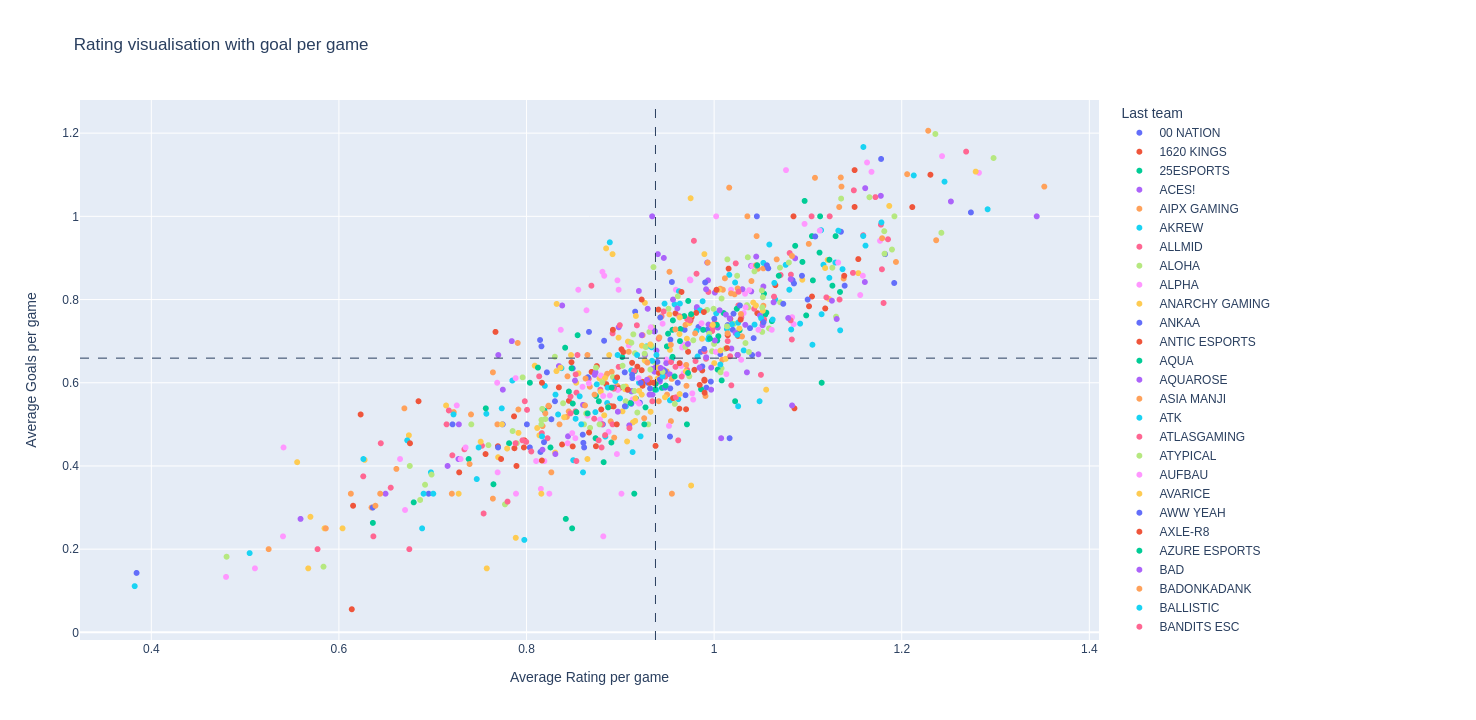

In [18]:
fig_11 = px.scatter(avg_all,
                 x="rating",
                 y="goals",
                 color='team_name',
                 hover_data=['count', 'player_tag'],
                 labels={"team_name": "Last team",
                         "rating": "Average Rating per game",
                         "goals": "Average Goals per game",
                         "player_tag": "Player tag",
                         'count': "Games played"},
                 title='Rating visualisation with goal per game',
                 width=960,
                 height=720)

fig_11.add_vline(x=avg_describe.loc['mean', 'rating'], line_width=1, line_dash="dash")
fig_11.add_hline(y=avg_describe.loc['mean', 'goals'], line_width=1, line_dash="dash")

fig_11.show()

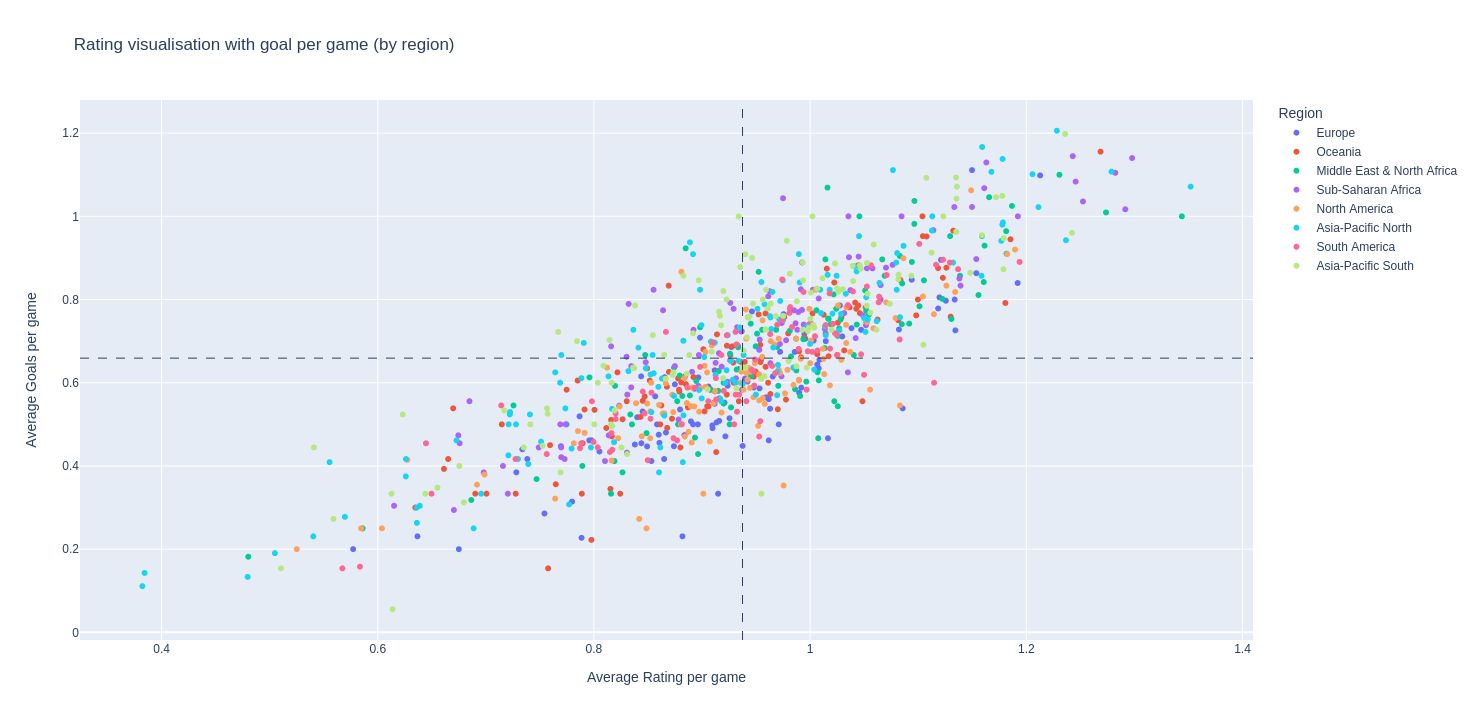

In [19]:
fig_12 = px.scatter(avg_all,
                 x="rating",
                 y="goals",
                 color='team_region',
                 hover_data=['count', 'player_tag', 'team_name'],
                 labels={"team_name": "Last team",
                         "team_region" : 'Region',
                         "rating": "Average Rating per game",
                         "goals": "Average Goals per game",
                         "player_tag": "Player tag",
                         'count': "Games played"},
                 title='Rating visualisation with goal per game (by region)',
                 width=960,
                 height=720)

fig_12.add_vline(x=avg_describe.loc['mean', 'rating'], line_width=1, line_dash="dash")
fig_12.add_hline(y=avg_describe.loc['mean', 'goals'], line_width=1, line_dash="dash")

fig_12.show()

### Assists / Score

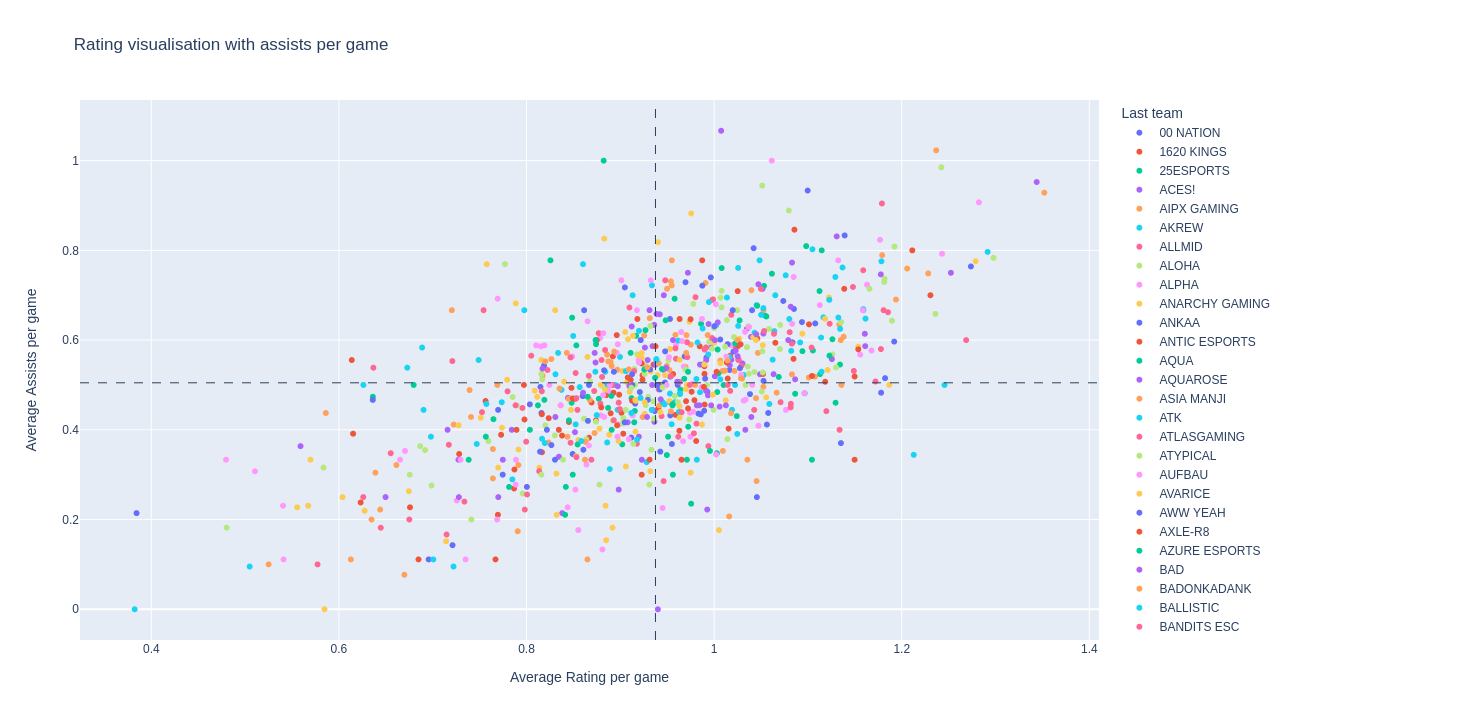

In [20]:
fig_21 = px.scatter(avg_all,
                 x="rating",
                 y="assists",
                 color='team_name',
                 hover_data=['count', 'player_tag'],
                 labels={"team_name": "Last team",
                         "rating": "Average Rating per game",
                         "assists": "Average Assists per game",
                         "player_tag": "Player tag",
                         'count': "Games played"},
                 title='Rating visualisation with assists per game',
                 width=960,
                 height=720)

fig_21.add_vline(x=avg_describe.loc['mean', 'rating'], line_width=1, line_dash="dash")
fig_21.add_hline(y=avg_describe.loc['mean', 'assists'], line_width=1, line_dash="dash")

fig_21.show()

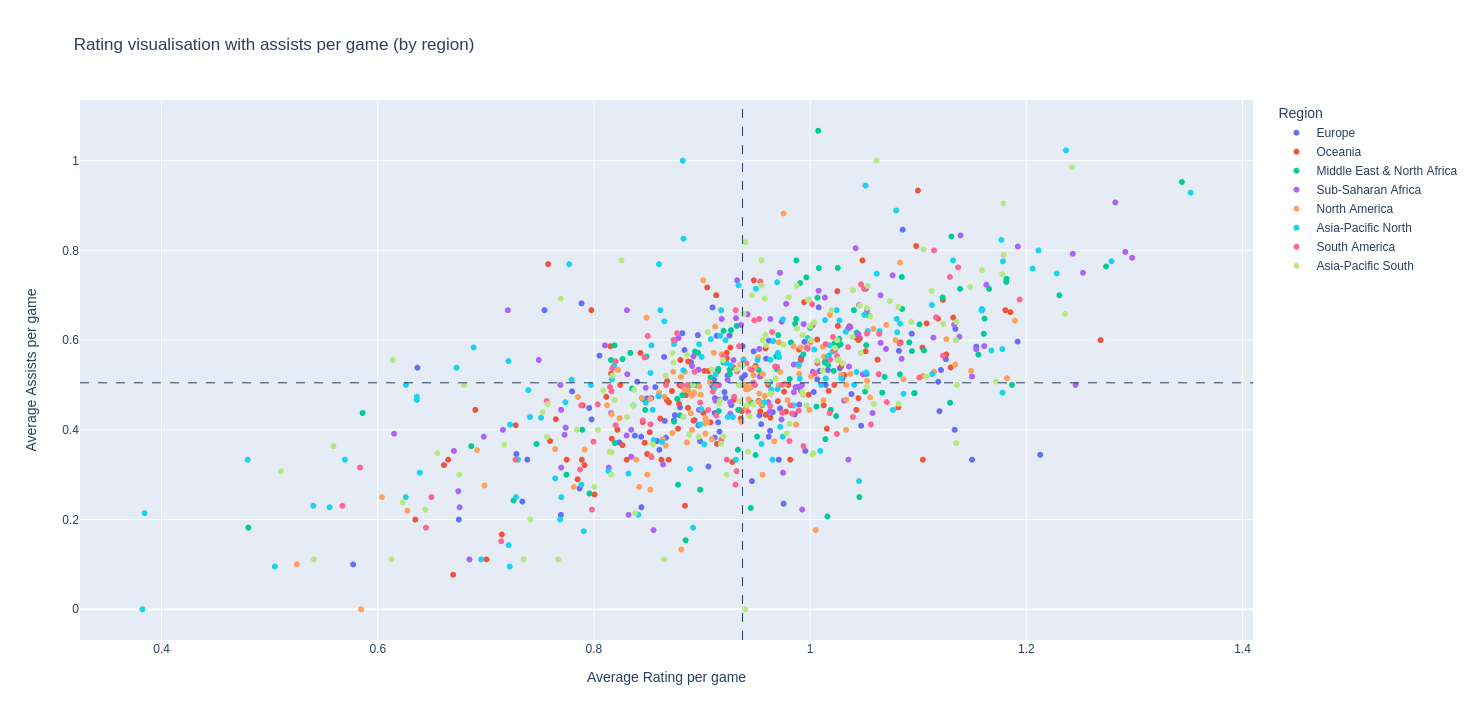

In [21]:
fig_22 = px.scatter(avg_all,
                 x="rating",
                 y="assists",
                 color='team_region',
                 hover_data=['count', 'player_tag', 'team_name'],
                 labels={"team_name": "Last team",
                         "team_region" : 'Region',
                         "rating": "Average Rating per game",
                         "assists": "Average Assists per game",
                         "player_tag": "Player tag",
                         'count': "Games played"},
                 title='Rating visualisation with assists per game (by region)',
                 width=960,
                 height=720)

fig_22.add_vline(x=avg_describe.loc['mean', 'rating'], line_width=1, line_dash="dash")
fig_22.add_hline(y=avg_describe.loc['mean', 'assists'], line_width=1, line_dash="dash")

fig_22.show()

### Saves / Score

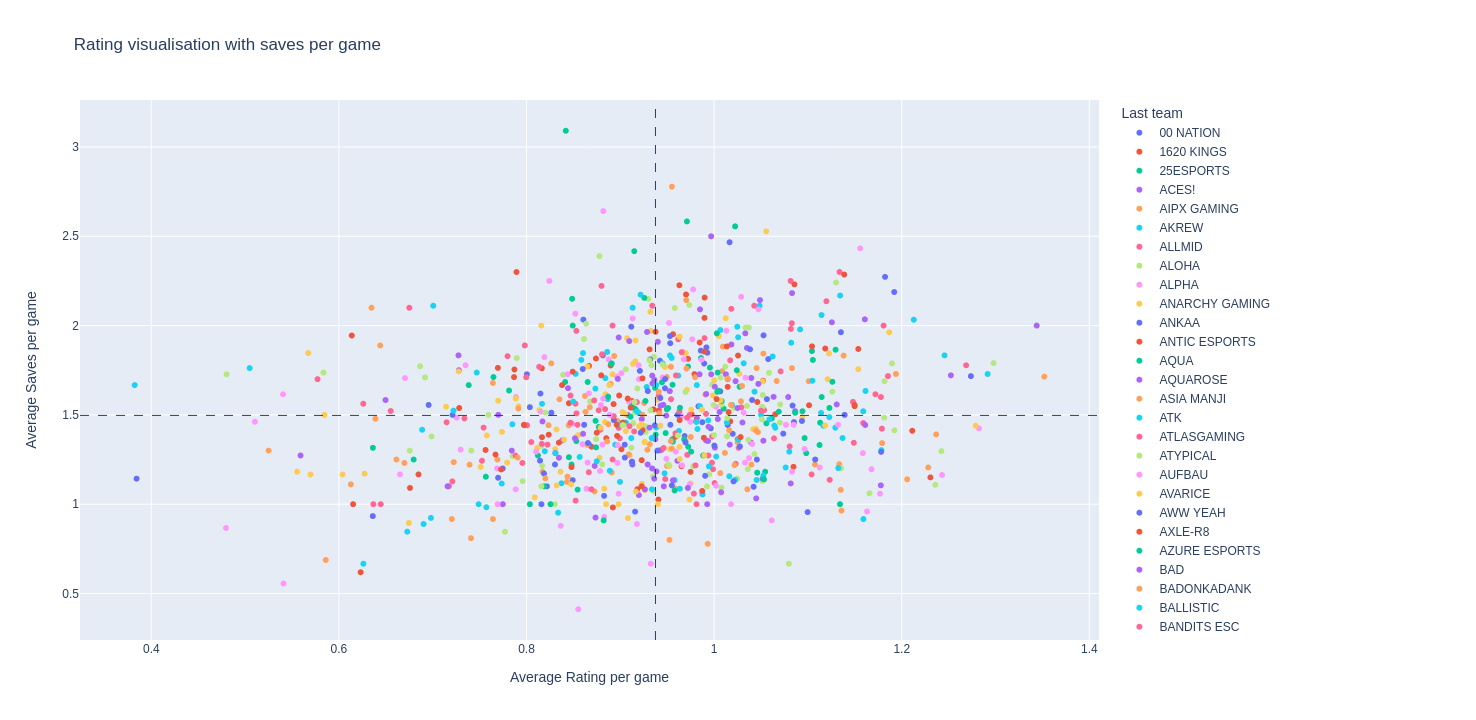

In [22]:
fig_31 = px.scatter(avg_all,
                 x="rating",
                 y="saves",
                 color='team_name',
                 hover_data=['count', 'player_tag'],
                 labels={"team_name": "Last team",
                         "rating": "Average Rating per game",
                         "saves": "Average Saves per game",
                         "player_tag": "Player tag",
                         'count': "Games played"},
                 title='Rating visualisation with saves per game',
                 width=960,
                 height=720)

fig_31.add_vline(x=avg_describe.loc['mean', 'rating'], line_width=1, line_dash="dash")
fig_31.add_hline(y=avg_describe.loc['mean', 'saves'], line_width=1, line_dash="dash")

fig_31.show()

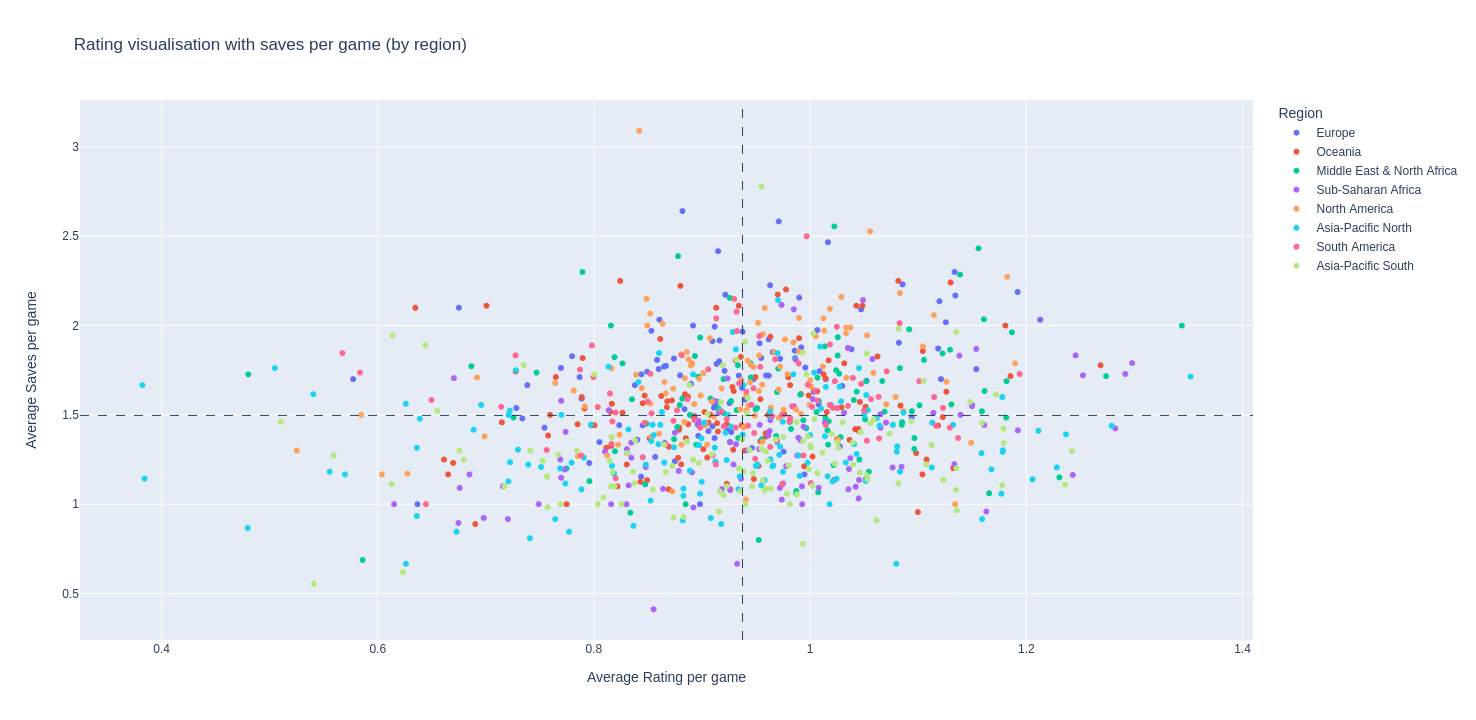

In [23]:
fig_32 = px.scatter(avg_all,
                 x="rating",
                 y="saves",
                 color='team_region',
                 hover_data=['count', 'player_tag', 'team_name'],
                 labels={"team_name": "Last team",
                         "team_region" : 'Region',
                         "rating": "Average Rating per game",
                         "saves": "Average Saves per game",
                         "player_tag": "Player tag",
                         'count': "Games played"},
                 title='Rating visualisation with saves per game (by region)',
                 width=960,
                 height=720)

fig_32.add_vline(x=avg_describe.loc['mean', 'rating'], line_width=1, line_dash="dash")
fig_32.add_hline(y=avg_describe.loc['mean', 'saves'], line_width=1, line_dash="dash")

fig_32.show()